In [1]:
import sys
import requests
from IPython.core.display import HTML 
from IPython.core.display import Image, display
import os
import webbrowser
import tarfile
import re
import rasterio
from rasterio.mask import mask
import geopandas as gp
import numpy as np
import shapely
from shapely import geometry
from shapely.geometry import shape, Point, LineString, Polygon , mapping
import matplotlib.pyplot as plt
from rasterio.plot import show
import pyproj
from pyproj import CRS
import fiona
import os 
import re
from rasterio.plot import adjust_band
from rasterio.plot import reshape_as_raster, reshape_as_image
import matplotlib.pyplot as plt
from pyproj import transform
from pyproj import Proj
import ast
import pandas as pd
from IPython.display import Audio, display
from timeit import default_timer as timer

In [2]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])

In [3]:
path = 'C:/Users/SimãoPauloLealBarbos/Downloads/versao alternativa/Machakos_image_satellite_1/'
os.listdir(path)

['Machakos_A1.ecw', 'Machakos_A1.eww', 'Machakos_A1.prj', 'Machakos_A1.tif']

META: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 32294, 'height': 90622, 'count': 4, 'crs': CRS.from_epsg(32737), 'transform': Affine(0.09999999999999892, 0.0, 305698.0468,
       0.0, -0.09999999999999178, 9836803.1078)}
Shape:  90622 32294
Num bands:  4
45311 46811 16147 17647


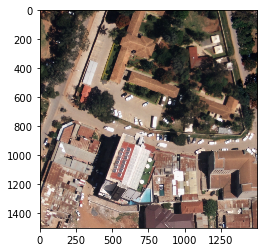

In [4]:
# save ecw file as tif with qgis
img_fp = 'C:/Users/SimãoPauloLealBarbos/Downloads/versao alternativa/Machakos_image_satellite_1/Machakos_A1.tif'

with rasterio.open(img_fp) as src:
    meta = src.meta
    print("META: " + str(meta))
    ylimit = meta["width"]
    xlimit = meta["height"]
    n_bands = meta["count"]
    print("Shape: ",xlimit, ylimit)
    print("Num bands: ",n_bands)
    #img = src.read()[:, int(xlimit/10) : int(xlimit/9) ,  int(ylimit/10) : int(ylimit/9) ]
    xmin = int(xlimit/2)
    xmax = int(xlimit/2) + 1500
    ymin = int(ylimit/2) 
    ymax = int(ylimit/2) + 1500
    print(xmin,xmax,ymin,ymax)
    img = src.read()[:, xmin : xmax , ymin : ymax]

#reshaped_img = reshape_as_image(img)
#fig, axs = plt.subplots(1,figsize=(18,18))
#img_stretched_train = color_stretch(reshaped_img, [2,1,0])
#axs.imshow(img_stretched_train)
#axs.imshow( reshape_as_image(img[[2,1,0], :, :]) )
#plt.show()
show(img[[0,1,2], :, :])

In [8]:
path = 'C:/Users/SimãoPauloLealBarbos/Downloads/versao alternativa/wetransfer-91df71/DATA/LIVRAISON_20190215/V2'
os.listdir(path)

['machakos_v2.dbf',
 'machakos_v2.prj',
 'machakos_v2.sbn',
 'machakos_v2.sbx',
 'machakos_v2.shp',
 'machakos_v2.shx',
 'nairobi_v2.dbf',
 'nairobi_v2.prj',
 'nairobi_v2.sbn',
 'nairobi_v2.sbx',
 'nairobi_v2.shp',
 'nairobi_v2.shx']

In [11]:
file =  path + '/machakos_v2.shp'
shapefile = gp.read_file(file)
shapefile

,ID,GRIDCODE,geometry
0,3,1,"POLYGON ((307265.747 9836802.108, 307265.447 9..."
1,8,1,"POLYGON ((307220.747 9836803.108, 307221.147 9..."
2,16,1,"POLYGON ((307224.547 9836800.008, 307224.447 9..."
3,20,1,"POLYGON ((307225.447 9836799.008, 307225.247 9..."
4,22,1,"POLYGON ((307283.347 9836796.608, 307283.247 9..."
...,...,...,...
41916,97210,1,"POLYGON ((306108.347 9827743.008, 306108.247 9..."
41917,97212,1,"POLYGON ((306146.647 9827742.808, 306146.447 9..."
41918,97218,1,"POLYGON ((306211.647 9827741.908, 306211.747 9..."
41919,97219,1,"POLYGON ((306103.647 9827741.408, 306103.647 9..."
